# Supermarket Sales Analysis

### Setup and Cleaning

In [91]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [92]:
# Reading the data

df = pd.read_csv("./supermarket_sales.csv")

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [93]:
# Remove unwanted collumns

sales = df.drop(columns=['City', 'Customer type', 'Tax 5%', 'Total', 'Payment', 'gross margin percentage', 'gross income', 'cogs'])
sales.head()

,Invoice ID,Branch,Gender,Product line,Unit price,Quantity,Date,Time,Rating
0,750-67-8428,A,Female,Health and beauty,74.69,7,1/5/2019,13:08,9.1
1,226-31-3081,C,Female,Electronic accessories,15.28,5,3/8/2019,10:29,9.6
2,631-41-3108,A,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,7.4
3,123-19-1176,A,Male,Health and beauty,58.22,8,1/27/2019,20:33,8.4
4,373-73-7910,A,Male,Sports and travel,86.31,7,2/8/2019,10:37,5.3


### What was the best month for sales?

In [94]:
# Add month collumn

sales['Month'] = sales['Date'].str[0]
sales['Month'] = sales['Month'].astype('int32')
sales.head()

,Invoice ID,Branch,Gender,Product line,Unit price,Quantity,Date,Time,Rating,Month
0,750-67-8428,A,Female,Health and beauty,74.69,7,1/5/2019,13:08,9.1,1
1,226-31-3081,C,Female,Electronic accessories,15.28,5,3/8/2019,10:29,9.6,3
2,631-41-3108,A,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,7.4,3
3,123-19-1176,A,Male,Health and beauty,58.22,8,1/27/2019,20:33,8.4,1
4,373-73-7910,A,Male,Sports and travel,86.31,7,2/8/2019,10:37,5.3,2


In [95]:
# Add total sales collumn

sales['Total'] = sales['Unit price'] * sales['Quantity']
sales.head()

,Invoice ID,Branch,Gender,Product line,Unit price,Quantity,Date,Time,Rating,Month,Total
0,750-67-8428,A,Female,Health and beauty,74.69,7,1/5/2019,13:08,9.1,1,522.83
1,226-31-3081,C,Female,Electronic accessories,15.28,5,3/8/2019,10:29,9.6,3,76.40
2,631-41-3108,A,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,7.4,3,324.31
3,123-19-1176,A,Male,Health and beauty,58.22,8,1/27/2019,20:33,8.4,1,465.76
4,373-73-7910,A,Male,Sports and travel,86.31,7,2/8/2019,10:37,5.3,2,604.17


In [96]:
# group sales by month

results = sales.groupby('Month').sum()
print(results['Total'])

Month
1    110754.16
2     92589.88
3    104243.34
Name: Total, dtype: float64


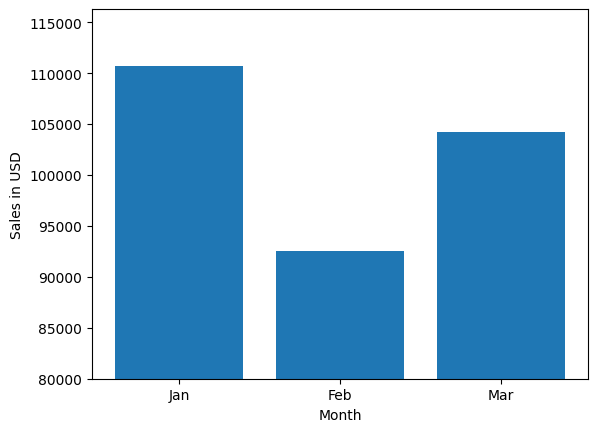

In [100]:
# plot data

months = range(1,4)
month_names = ['Jan', 'Feb', 'Mar']

plt.bar(months, results['Total'])
plt.xticks(months, month_names)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.ylim(bottom=80000)
plt.show()

January had the most sales while February had the least sales. This could be due to January having 3 more days in its month and so there would be fewer shopping days in February. Also, January might see higher sales due to post-holiday shopping or new year promotions. March sales might increase as spring approaches, potentially due to seasonal promotions

### What are the total sales by branch?

In [101]:
# group sales by Branch

results = sales.groupby('Branch').sum()
print(results['Total'])

Branch
A    101143.21
B    101140.64
C    105303.53
Name: Total, dtype: float64


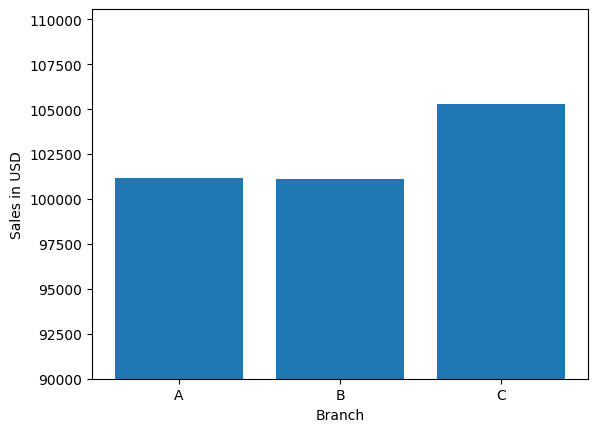

In [103]:
# plot data

branch = range(1,4)
branch_names = ['A', 'B', 'C']

plt.bar(branch, results['Total'])
plt.xticks(branch, branch_names)
plt.xlabel('Branch')
plt.ylabel('Sales in USD')
plt.ylim(bottom=90000)
plt.show()

Branch C outperformed A and B by a notable margin (4,160.89 more than A and 4,162.89 more than B).
Potential Factors for Success: 

- It may be situated in a more favorable area with higher foot traffic.
- Effective Marketing: Perhaps Branch C has implemented successful promotional strategies or advertising that attract more customers.
- Product Range: Branch C might have a more appealing product assortment or better stock levels compared to A and B.
- Customer Service: Excellent customer service in Branch C could lead to increased customer satisfaction and repeat business.

### Which product line generates the most revenue?

In [104]:
# group sales by product line

results = sales.groupby('Product line').sum()
print(results['Total'])

Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: Total, dtype: float64


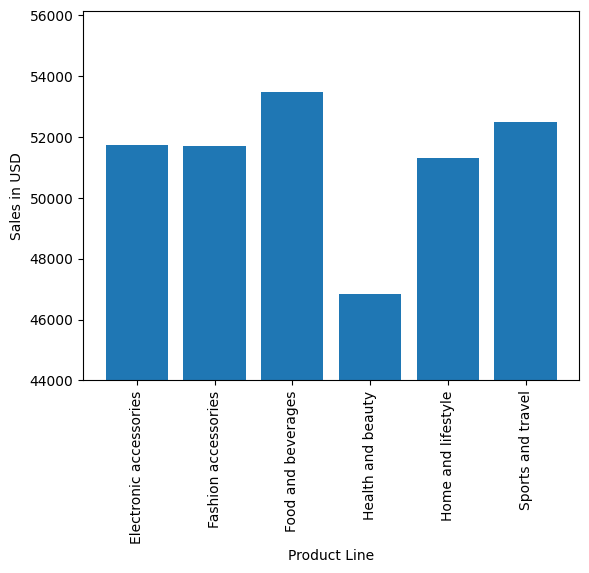

In [116]:
# plot data

product_lines = range(1,7)
pl_names = ['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']

plt.bar(product_lines, results['Total'])
plt.xticks(product_lines, pl_names, rotation='vertical')
plt.xlabel('Product Line')
plt.ylabel('Sales in USD')
plt.ylim(bottom=44000)
plt.show()

Food and Beverages has the highest total sales at $53,471.28. This indicates a strong consumer demand in this category, suggesting it may be a staple for customers.

Health and Beauty has the lowest sales at $46,851.18, indicating that this category might not be as strong in terms of consumer interest or that there may be opportunities for growth and enhancement in product offerings.

### What are the highest and lowest selling products based on quantity sold vs. revenue generated?

In [145]:
print(results['Total'], results['Quantity'])

Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: Total, dtype: float64 Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64


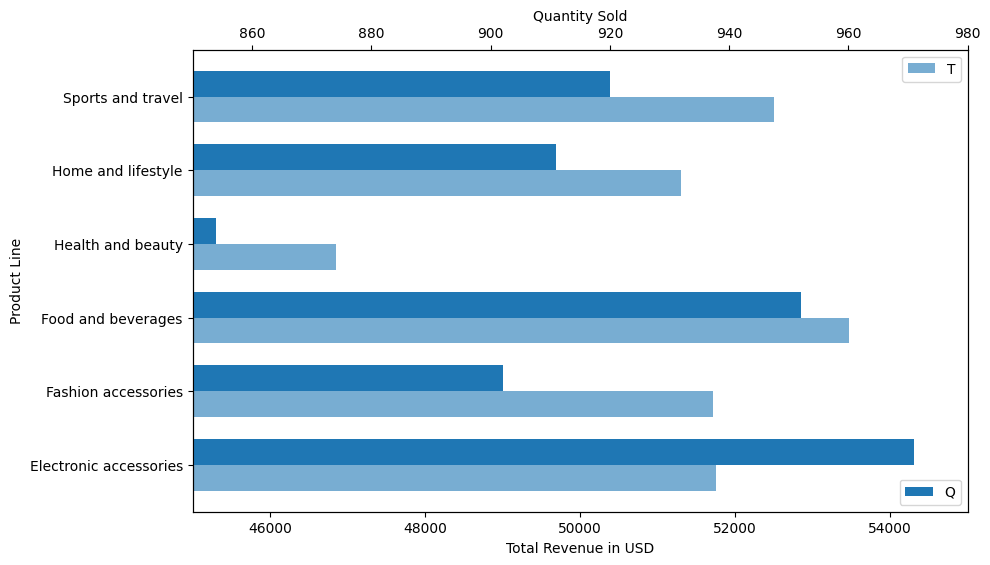

In [241]:
# plotting the data

import numpy as np

fig, ax1 = plt.subplots(figsize=(10, 6))
y_positions = np.arange(len(product_lines))
bar_width = 0.35

ax1.barh(y_positions - bar_width/2, results['Total'], bar_width, alpha = 0.6)
plt.yticks(y_positions, pl_names, rotation='horizontal')
ax1.set_xlabel('Total Revenue in USD')
ax1.set_ylabel('Product Line')

ax2 = ax1.twiny()
ax2.set_xlabel('Quantity Sold')
ax2.barh(y_positions + bar_width/2, results['Quantity'], bar_width)

ax1.set_xlim(left=45000, right=55000)
ax2.set_xlim(left=850, right=980)

ax1.legend('Total Revenue')
ax2.legend('Quantity Sold', loc = 'lower right')

Food and Beverages has the highest revenue, which suggests it is either priced higher, has a larger volume of sales at higher price points, or is a popular product among customers.

Electronic Accessories, while having a slightly lower revenue compared to Food and Beverages, leads in quantity sold, indicating that it might be a more frequently purchased item, possibly due to lower pricing, promotional activities, or customer demand.

The product line that generates the lowest revenue is Health and Beauty with $46,851.18.

The product line with the lowest quantity sold is Health and Beauty with 854 units sold. This could indicate a lack of customer interest or that it is priced too low compared to its competitors. The low quantity sold suggests that fewer customers are purchasing this product line, which might be due to factors such as poor marketing, lack of availability, or customer preference for other product lines. Since health and beauty is a field that is dominated by women, gender could also play a major role in this.

### How do sales vary by customer gender across different product lines?

In [242]:
gender_count = sales.groupby(['Product line', 'Gender']).size().unstack()

print(gender_count)

Gender                  Female  Male
Product line                        
Electronic accessories      84    86
Fashion accessories         96    82
Food and beverages          90    84
Health and beauty           64    88
Home and lifestyle          79    81
Sports and travel           88    78


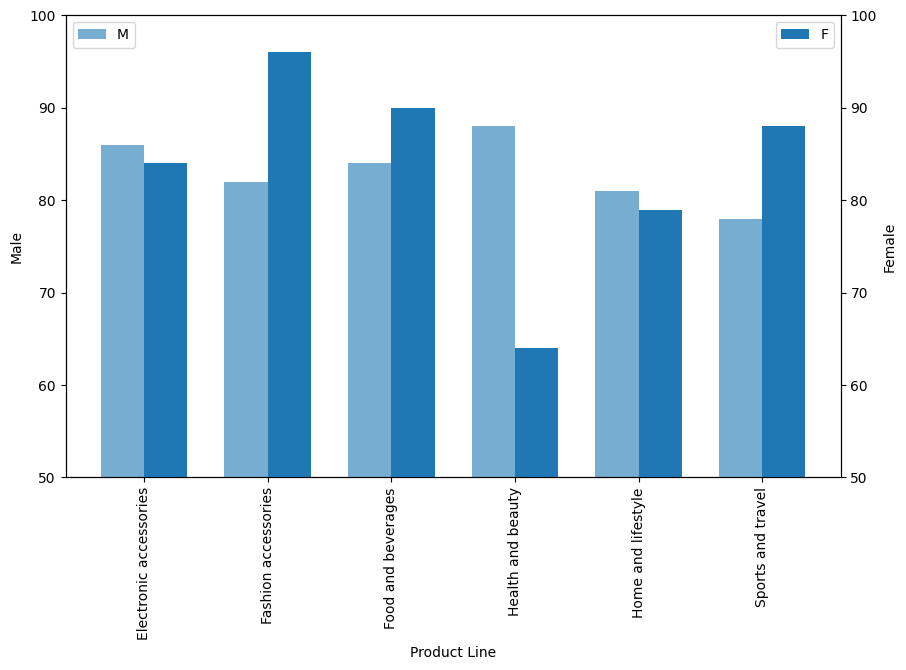

In [243]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x_positions = np.arange(len(product_lines))
bar_width = 0.35

ax1.bar(x_positions - bar_width/2, gender_count['Male'], bar_width, alpha = 0.6)
plt.xticks(x_positions, pl_names, rotation='vertical')
ax1.set_xlabel('Product Line')
ax1.set_ylabel('Male')

ax2 = ax1.twinx()
ax2.bar(x_positions + bar_width/2, gender_count['Female'], bar_width)
ax2.set_ylabel('Female')

ax1.set_ylim(bottom=50, top=100)
ax2.set_ylim(bottom=50, top=100)

ax1.legend('Male', loc = 'upper left')
ax2.legend('Female')

Fashion Accessories: Female customers (96) make more purchases than male customers (82) in this product line, indicating a stronger interest among female customers.

Health and Beauty: Male customers (88) show higher purchase activity than female customers (64) in this category. This data is surprising as you would expect health and beauty propducts to appeal more to female customers. This could be due to men buying gifts for valentine's day. Otherwise, this could be an opportunity to attract more female customers with targeted marketing.

Sports and Travel: Female customers (88) lead over male customers (78), suggesting a stronger female preference or higher engagement in this product line.

For product lines with lower engagement from one gender (e.g., Health and Beauty for females), introducing new products or tailoring messaging to appeal more to the less-engaged gender could drive sales increases.

Given the clear preference differences, you could design gender-specific promotions or advertisements. For instance, marketing campaigns targeting female customers could focus on Fashion Accessories and Sports and Travel, while campaigns targeting male customers might emphasize Health and Beauty.

### Are there specific times of day with higher sales?

### What is the average rating by branch and product line?

### Are there correlations between rating and quantity sold, product line, or branch?

### What is the rating trend over time? Are ratings improving, declining, or stable?